In [1]:
import tensorflow as tf
from tensorflow import keras

## Load the dataset

In [2]:
fashion_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

## Train test split

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Sneaker'

## Creating the model using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

The model’s summary() method displays all the model’s layers,14 including each layer’s
name , its output shape, and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05066265,  0.034888  ,  0.02547351, ...,  0.0179001 ,
         0.00862794, -0.06485803],
       [-0.05595791, -0.01683663,  0.03160328, ..., -0.0628795 ,
         0.03932044, -0.03690926],
       [-0.06554433,  0.03393502, -0.01341086, ...,  0.0205649 ,
        -0.03380791,  0.06449108],
       ...,
       [-0.03513404, -0.03959444,  0.01448471, ...,  0.0489855 ,
        -0.04675111, -0.00040572],
       [-0.03701661,  0.02519353,  0.00171137, ..., -0.06974439,
         0.02207471,  0.04530635],
       [-0.06507648,  0.06377356,  0.00646108, ..., -0.04652545,
        -0.02149457, -0.00132103]], dtype=float32)

In [13]:
weights.shape

(784, 300)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
biases.shape

(300,)

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
            )

## Training and evaluating the model

The fit() method returns a History object containing the training parameters
(history.params), the list of epochs it went through (history.epoch), and most
importantly a dictionary (history.history) containing the loss and extra metrics it
measured at the end of each epoch on the training set and on the validation set (if
any)

In [17]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 40s 17ms/step - loss: 0.6094 - accuracy: 0.8419 - val_loss: 0.3067 - val_accuracy: 0.9126
Epoch 2/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2864 - accuracy: 0.9179 - val_loss: 0.2387 - val_accuracy: 0.9332
Epoch 3/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2350 - accuracy: 0.9330 - val_loss: 0.1997 - val_accuracy: 0.9432
Epoch 4/20
1719/1719 [==============================] - 25s 14ms/step - loss: 0.2008 - accuracy: 0.9430 - val_loss: 0.1763 - val_accuracy: 0.9508
Epoch 5/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.1757 - accuracy: 0.9498 - val_loss: 0.1573 - val_accuracy: 0.9564
Epoch 6/20
1719/1719 [==============================] - 37s 22ms/step - loss: 0.1556 - accuracy: 0.9551 - val_loss: 0.1434 - val_accuracy: 0.9594
Epoch 7/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.1394 - accuracy: 0.9603 - val_loss: 0.1374 -

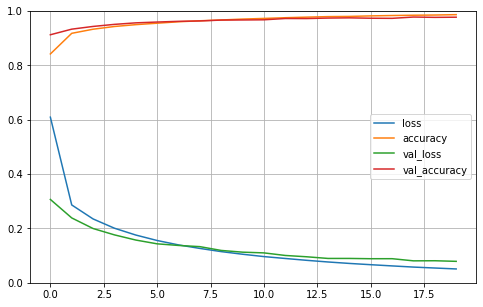

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 6ms/step - loss: 13.2742 - accuracy: 0.9729


[13.27416706085205, 0.9728999733924866]